In [50]:
import pandas as pd
from glob import glob
import os
%matplotlib inline

In [24]:
import datetime

epoch = datetime.datetime.utcfromtimestamp(0)

def unix_time_millis(dt):
    return int((dt - epoch).total_seconds() * 1000.0)

In [25]:
fp = r"D:\Projects\Pr\2505.12\Dresden\Sensor series (waterstandsverlopen)\Dresden-water-level.csv"

In [53]:
df = pd.read_csv(fp)

In [54]:
df['measuringstationid'] = 1
df['scenarioid'] = 1
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.resample('1H').mean()
df.reset_index(inplace=True)
#df['datetime'] = df['date'].apply(lambda x: unix_time_millis(x))
df['datetime'] = df['date'].apply(lambda x: unix_time_millis(x))
df['waterlevel'] = df['W [cm]'] / 100 # in meters
df['scenarioid'] = df['scenarioid'].astype(int)
df['measuringstationid'] = df['measuringstationid'].astype(int)

In [57]:
df_slice = df[['scenarioid', 'measuringstationid', 'datetime', 'waterlevel' ]]

In [58]:
df_slice.to_csv(r'D:\Projects\Pr\2505.12\Dresden\Sensor series (waterstandsverlopen)\series_dresden.csv', index=False)

In [51]:
df.set_index('date', inplace=True)

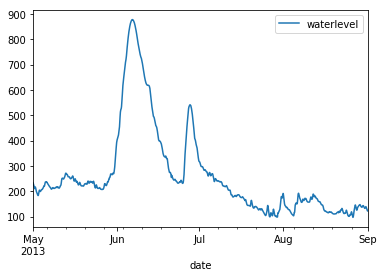

In [52]:
df.plot(y='waterlevel')